In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Получение данных по ценам и секторам
Данные из выгрузок Анастасии Малышевой

In [3]:
data = pd.read_csv(r'prices.csv')

In [4]:
company_profiles = pd.read_csv(r'company_profiles.csv')

In [5]:
company_profiles = company_profiles[['symbol', 'sector']]

In [6]:
data.columns

Index(['Unnamed: 0', '_id', 'adjClose', 'change', 'changeOverTime',
       'changePercent', 'close', 'closeCA', 'date', 'high', 'low', 'open',
       'symbol', 'tm', 'unadjustedVolume', 'volume', 'vwap', 'ut'],
      dtype='object')

In [7]:
data.head()

,Unnamed: 0,_id,adjClose,change,changeOverTime,changePercent,close,closeCA,date,high,low,open,symbol,tm,unadjustedVolume,volume,vwap,ut
0,0,0486.HK2020-01-02,3.79,-0.06,-0.01558,-1.558,3.79,3.79,2020-01-01 21:00:00,3.85,3.76,3.85,0486.HK,NaN,2062000.0,NaN,3.80000,2020-01-01 21:00:00
1,1,0486.HK2020-01-03,3.84,0.02,0.00524,0.524,3.84,3.84,2020-01-02 21:00:00,3.85,3.82,3.82,0486.HK,NaN,5025000.0,NaN,3.83667,2020-01-02 21:00:00
2,2,0486.HK2020-01-04,3.84,0.02,0.00524,0.524,3.84,3.84,2020-01-03 21:00:00,3.85,3.82,3.82,0486.HK,NaN,5025000.0,NaN,3.83667,2020-01-02 21:00:00
3,3,0486.HK2020-01-05,3.84,0.02,0.00524,0.524,3.84,3.84,2020-01-04 21:00:00,3.85,3.82,3.82,0486.HK,NaN,5025000.0,NaN,3.83667,2020-01-02 21:00:00
4,4,0486.HK2020-01-06,3.77,-0.03,-0.00789,-0.789,3.77,3.77,2020-01-05 21:00:00,3.81,3.76,3.80,0486.HK,NaN,2909000.0,NaN,3.78000,2020-01-05 21:00:00


In [8]:
top = data.groupby('symbol')['unadjustedVolume'].mean().reset_index()

In [9]:
base_symbols = set([
"SBER.ME","PLZL.ME",
"PHOR.ME","LKOH.ME","SGZH.ME",
"GMKN.ME","BLNG.ME","ALRS.ME",
"AFKS.ME","AFLT.ME","AMEZ.ME",
"BANEP.ME","MAGN.ME",
])

In [10]:
data = data[data['symbol'].isin(base_symbols)]

In [11]:
company_profiles = company_profiles[company_profiles['symbol'].isin(base_symbols)]

In [12]:
data.shape

(15172, 18)

In [13]:
data['date'] = pd.to_datetime(data['date'])

In [14]:
ohlc = data.pivot(index='date', columns='symbol', values='close')

In [15]:
ohlc = ohlc.reset_index().rename(columns={'date': 'Date'}).set_index('Date')

In [16]:
prices = ohlc.dropna(how="all")
prices.tail()

symbol,AFKS.ME,AFLT.ME,ALRS.ME,AMEZ.ME,BANEP.ME,BLNG.ME,GMKN.ME,LKOH.ME,MAGN.ME,PHOR.ME,PLZL.ME,SBER.ME,SGZH.ME
Date,,,,,,,,,,,,,
2024-06-03 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,140.80,NaN,NaN,NaN,NaN,316.42,NaN
2024-06-04 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,139.02,NaN,NaN,NaN,NaN,314.68,NaN
2024-06-05 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,141.36,NaN,NaN,NaN,NaN,314.70,NaN
2024-06-06 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,141.36,NaN,NaN,NaN,NaN,314.70,NaN
2024-06-07 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,141.36,NaN,NaN,NaN,NaN,314.70,NaN


In [17]:
prices.head()

symbol,AFKS.ME,AFLT.ME,ALRS.ME,AMEZ.ME,BANEP.ME,BLNG.ME,GMKN.ME,LKOH.ME,MAGN.ME,PHOR.ME,PLZL.ME,SBER.ME,SGZH.ME
Date,,,,,,,,,,,,,
2020-01-01 21:00:00,15.236,103.500000,84.320000,4.88,172250.0,4.00,191.00,6169.0,41.950001,2408.0,7103.5,254.75,NaN
2020-01-02 21:00:00,15.134,103.339996,85.330002,5.00,173150.0,3.99,194.46,6294.0,42.544998,2427.0,7286.0,255.00,NaN
2020-01-03 21:00:00,15.134,103.339996,85.330002,5.00,173150.0,3.99,194.46,6294.0,42.544998,2427.0,7286.0,255.00,NaN
2020-01-04 21:00:00,15.134,103.339996,85.330002,5.00,173150.0,3.99,194.46,6294.0,42.544998,2427.0,7286.0,255.00,NaN
2020-01-05 21:00:00,15.039,103.519997,85.239998,5.04,174650.0,4.07,195.86,6382.0,42.299999,2418.0,7421.5,253.90,NaN


In [18]:
prices

symbol,AFKS.ME,AFLT.ME,ALRS.ME,AMEZ.ME,BANEP.ME,BLNG.ME,GMKN.ME,LKOH.ME,MAGN.ME,PHOR.ME,PLZL.ME,SBER.ME,SGZH.ME
Date,,,,,,,,,,,,,
2020-01-01 21:00:00,15.236,103.500000,84.320000,4.88,172250.0,4.00,191.00,6169.0,41.950001,2408.0,7103.5,254.75,NaN
2020-01-02 21:00:00,15.134,103.339996,85.330002,5.00,173150.0,3.99,194.46,6294.0,42.544998,2427.0,7286.0,255.00,NaN
2020-01-03 21:00:00,15.134,103.339996,85.330002,5.00,173150.0,3.99,194.46,6294.0,42.544998,2427.0,7286.0,255.00,NaN
2020-01-04 21:00:00,15.134,103.339996,85.330002,5.00,173150.0,3.99,194.46,6294.0,42.544998,2427.0,7286.0,255.00,NaN
2020-01-05 21:00:00,15.039,103.519997,85.239998,5.04,174650.0,4.07,195.86,6382.0,42.299999,2418.0,7421.5,253.90,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-03 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,140.80,NaN,NaN,NaN,NaN,316.42,NaN
2024-06-04 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,139.02,NaN,NaN,NaN,NaN,314.68,NaN
2024-06-05 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,141.36,NaN,NaN,NaN,NaN,314.70,NaN


In [19]:
prices = prices[prices.index >= "2020-07-01"]

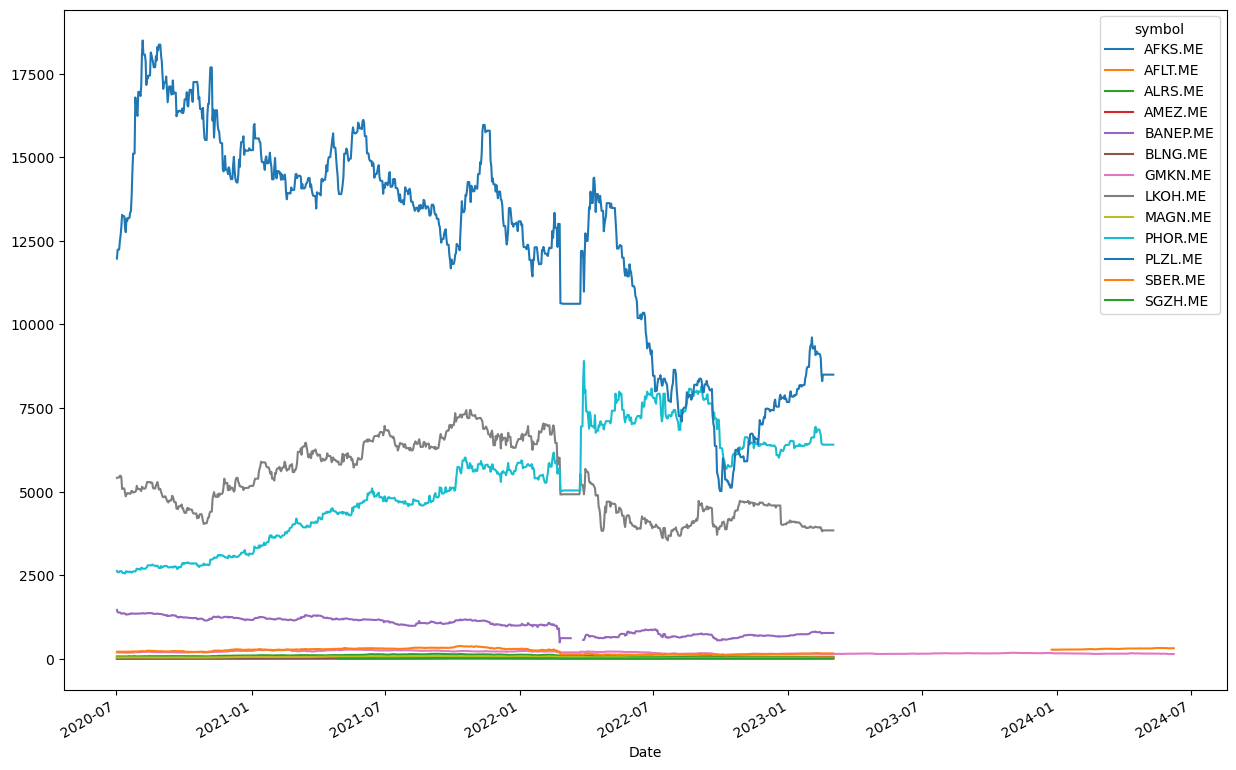

In [20]:
prices[prices.index >= "2020-07-01"].plot(figsize=(15,10));

## Расчет матрицы ковариации

In [21]:
import pypfopt
pypfopt.__version__

'1.5.5'

In [22]:
from pypfopt import risk_models
from pypfopt import plotting

sample_cov = risk_models.sample_cov(prices, frequency=252)
sample_cov

symbol,AFKS.ME,AFLT.ME,ALRS.ME,AMEZ.ME,BANEP.ME,BLNG.ME,GMKN.ME,LKOH.ME,MAGN.ME,PHOR.ME,PLZL.ME,SBER.ME,SGZH.ME
symbol,,,,,,,,,,,,,
AFKS.ME,0.102374,0.053945,0.062844,0.026614,0.071278,0.046999,0.038496,0.025876,0.033496,0.014784,0.017647,0.030741,0.024090
AFLT.ME,0.053945,0.145360,0.041539,0.032413,0.054240,0.046764,0.023327,0.017954,0.026564,-0.005156,0.001852,0.031937,0.019287
ALRS.ME,0.062844,0.041539,0.084571,0.025500,0.056403,0.041165,0.032606,0.024594,0.026015,0.011422,0.013847,0.026272,0.016789
AMEZ.ME,0.026614,0.032413,0.025500,0.186122,0.025347,0.091069,0.017335,0.007616,0.016194,0.005019,0.008222,0.011849,0.012626
BANEP.ME,0.071278,0.054240,0.056403,0.025347,0.101124,0.053139,0.031628,0.019886,0.022127,0.005111,0.005851,0.014446,0.016204
BLNG.ME,0.046999,0.046764,0.041165,0.091069,0.053139,0.427407,0.026677,0.011578,0.020879,0.005351,0.014003,0.016812,0.018735
GMKN.ME,0.038496,0.023327,0.032606,0.017335,0.031628,0.026677,0.057217,0.021792,0.022766,0.009470,0.017891,0.024385,0.015524
LKOH.ME,0.025876,0.017954,0.024594,0.007616,0.019886,0.011578,0.021792,0.064186,0.031744,0.013146,0.017808,0.050076,0.020863
MAGN.ME,0.033496,0.026564,0.026015,0.016194,0.022127,0.020879,0.022766,0.031744,0.074178,0.015830,0.022533,0.046338,0.026539


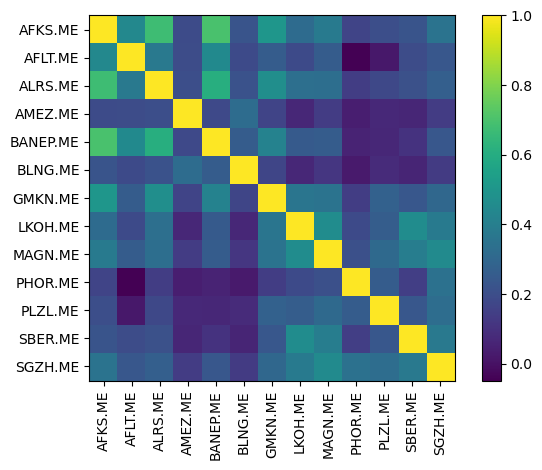

In [23]:
plotting.plot_covariance(sample_cov, plot_correlation=True);

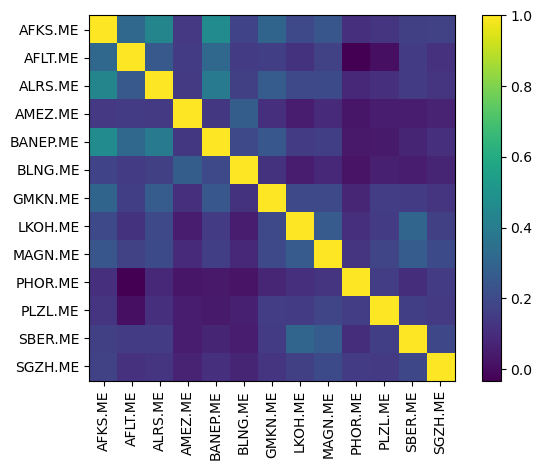

In [24]:
S = risk_models.CovarianceShrinkage(prices).ledoit_wolf()
plotting.plot_covariance(S, plot_correlation=True);

## Оценка доходности

будем использовать доходность CAPM, которая должна быть немного более стабильной, чем средняя историческая доходность по умолчанию. 

In [25]:
from pypfopt import expected_returns

mu = expected_returns.capm_return(prices)
mu

symbol
AFKS.ME     0.088490
AFLT.ME     0.081594
ALRS.ME     0.077967
AMEZ.ME     0.078504
BANEP.ME    0.079480
BLNG.ME     0.122873
GMKN.ME     0.062363
LKOH.ME     0.060845
MAGN.ME     0.067911
PHOR.ME     0.046049
PLZL.ME     0.051935
SBER.ME     0.084258
SGZH.ME     0.056322
Name: mkt, dtype: float64

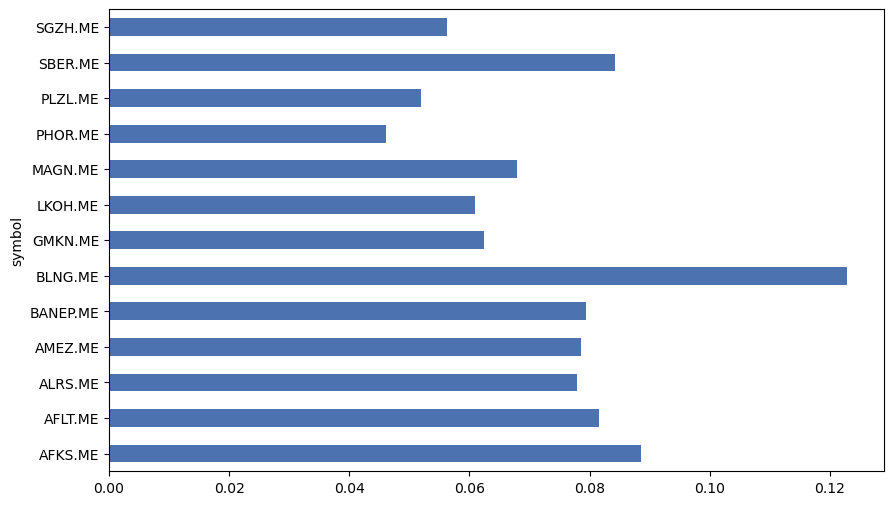

In [26]:
mu.plot.barh(figsize=(10,6));

## Минимизация разницы в long/short портфелях

In [27]:
from pypfopt import EfficientFrontier

In [28]:
S = risk_models.CovarianceShrinkage(prices).ledoit_wolf()

ef = EfficientFrontier(None, S, weight_bounds=(None, None))
ef.min_volatility()
weights = ef.clean_weights()
weights

OrderedDict([('AFKS.ME', -0.01685),
             ('AFLT.ME', 0.06276),
             ('ALRS.ME', 0.05221),
             ('AMEZ.ME', 0.06641),
             ('BANEP.ME', 0.06668),
             ('BLNG.ME', 0.00744),
             ('GMKN.ME', 0.11775),
             ('LKOH.ME', 0.10933),
             ('MAGN.ME', 0.06296),
             ('PHOR.ME', 0.14455),
             ('PLZL.ME', 0.12854),
             ('SBER.ME', 0.00595),
             ('SGZH.ME', 0.19228)])

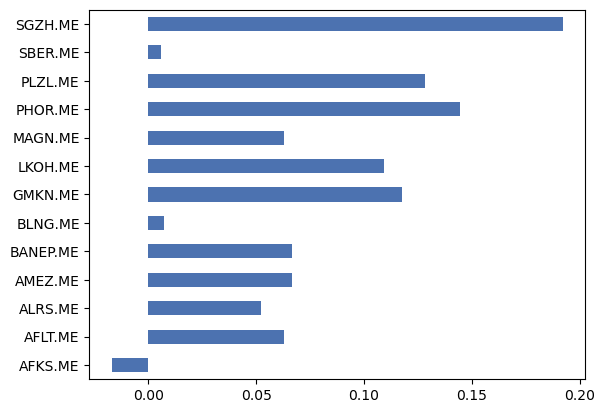

In [29]:
pd.Series(weights).plot.barh();

Расчет годовой волатильности

In [30]:
ef.portfolio_performance(verbose=True);

Annual volatility: 14.3%


In [31]:
prices = prices.ffill()

In [32]:
prices

symbol,AFKS.ME,AFLT.ME,ALRS.ME,AMEZ.ME,BANEP.ME,BLNG.ME,GMKN.ME,LKOH.ME,MAGN.ME,PHOR.ME,PLZL.ME,SBER.ME,SGZH.ME
Date,,,,,,,,,,,,,
2020-07-01 21:00:00,17.172001,66.933670,65.230003,4.110,1460.5,4.016,187.52,5409.0,37.605000,2626.0,11971.0,209.600006,NaN
2020-07-02 21:00:00,17.256001,65.970947,65.449997,4.125,1387.5,4.000,189.98,5423.5,37.950001,2590.0,12241.0,210.690002,NaN
2020-07-03 21:00:00,17.256001,65.970947,65.449997,4.125,1387.5,4.000,189.98,5423.5,37.950001,2590.0,12241.0,210.690002,NaN
2020-07-04 21:00:00,17.256001,65.970947,65.449997,4.125,1387.5,4.000,189.98,5423.5,37.950001,2590.0,12241.0,210.690002,NaN
2020-07-05 21:00:00,17.759001,66.003586,65.959999,4.175,1385.5,4.114,182.58,5473.0,38.560001,2621.0,12495.0,214.410004,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-03 21:00:00,12.501000,27.400000,59.300000,47.405,771.5,15.395,140.80,3840.0,36.700000,6405.0,8500.0,316.420000,4.989
2024-06-04 21:00:00,12.501000,27.400000,59.300000,47.405,771.5,15.395,139.02,3840.0,36.700000,6405.0,8500.0,314.680000,4.989
2024-06-05 21:00:00,12.501000,27.400000,59.300000,47.405,771.5,15.395,141.36,3840.0,36.700000,6405.0,8500.0,314.700000,4.989


Пример получения портфеля в котором соотношение short позиций 0.3 оносительно всего портфеля, и мы хотим распределить 200 тыс.

In [33]:
from pypfopt import DiscreteAllocation

latest_prices = prices.iloc[-1]
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=200000, short_ratio=0.3)
alloc, leftover = da.lp_portfolio()
print(f"Остаток {leftover:.2f}")
alloc

Остаток 933.94


{'AFLT.ME': 450,
 'ALRS.ME': 173,
 'AMEZ.ME': 276,
 'BANEP.ME': 17,
 'BLNG.ME': 95,
 'GMKN.ME': 164,
 'LKOH.ME': 6,
 'MAGN.ME': 338,
 'PHOR.ME': 4,
 'PLZL.ME': 3,
 'SBER.ME': 4,
 'SGZH.ME': 7580,
 'AFKS.ME': -4799}

# Ограничения по секторам

In [34]:
sector_mapper = company_profiles.set_index('symbol')['sector'].to_dict()

In [35]:
sector_mapper

{'AMEZ.ME': 'Basic Materials',
 'PHOR.ME': 'Basic Materials',
 'BLNG.ME': 'Energy',
 'SGZH.ME': 'Consumer Cyclical',
 'SBER.ME': 'Financial Services',
 'MAGN.ME': 'Basic Materials',
 'PLZL.ME': 'Basic Materials',
 'LKOH.ME': 'Energy',
 'BANEP.ME': 'Energy',
 'AFKS.ME': 'Communication Services',
 'AFLT.ME': 'Industrials',
 'ALRS.ME': 'Basic Materials',
 'GMKN.ME': 'Basic Materials'}

In [36]:


sector_lower = {
    "Energy": 0.1,
    "Financial Services": 0.05
}

sector_upper = {
    "Energy": 0.2,
    "Consumer Cyclical":0.1,
    "Basic Materials": 0.1
}

Мы хотим строго задать значение в бумагах LKOH.ME = 10%

In [37]:
mu = expected_returns.capm_return(prices)
S = risk_models.CovarianceShrinkage(prices).ledoit_wolf()

ef = EfficientFrontier(mu, S)
ef.add_sector_constraints(sector_mapper, sector_lower, sector_upper)

lkoh_index = ef.tickers.index("LKOH.ME")
ef.add_constraint(lambda w: w[lkoh_index] == 0.10)


ef.add_constraint(lambda w: w[10] >= 0.05)

ef.max_sharpe()
weights = ef.clean_weights()

In [38]:
weights

OrderedDict([('AFKS.ME', 0.27636),
             ('AFLT.ME', 0.1598),
             ('ALRS.ME', 0.0),
             ('AMEZ.ME', 0.05),
             ('BANEP.ME', 0.0),
             ('BLNG.ME', 0.1),
             ('GMKN.ME', 0.0),
             ('LKOH.ME', 0.1),
             ('MAGN.ME', 0.0),
             ('PHOR.ME', 0.0),
             ('PLZL.ME', 0.05),
             ('SBER.ME', 0.16385),
             ('SGZH.ME', 0.1)])

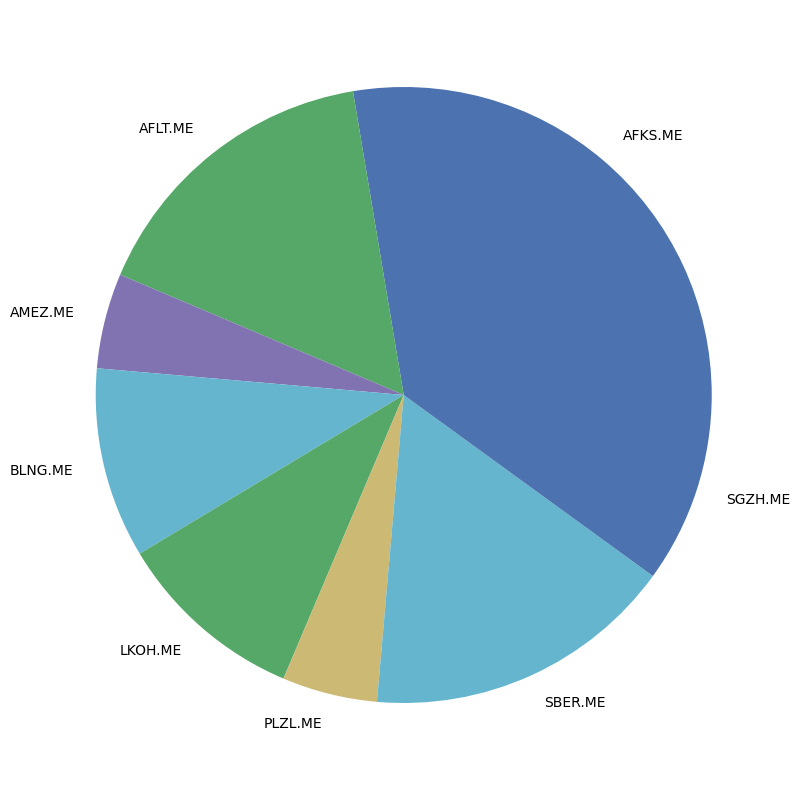

In [39]:
pd.Series(weights).plot.pie(figsize=(10,10));

In [40]:
for sector in set(sector_mapper.values()):
    total_weight = 0
    for t,w in weights.items():
        if sector_mapper[t] == sector:
            total_weight += w
    print(f"{sector}: {total_weight:.3f}")

Communication Services: 0.276
Financial Services: 0.164
Energy: 0.200
Industrials: 0.160
Consumer Cyclical: 0.100
Basic Materials: 0.100


# Максимизация доходов, с учетом заданных рисков

In [41]:
ef = EfficientFrontier(mu, S)
ef.add_sector_constraints(sector_mapper, sector_lower, sector_upper)
ef.efficient_risk(target_volatility=0.2)
weights = ef.clean_weights()
weights

OrderedDict([('AFKS.ME', 0.26587),
             ('AFLT.ME', 0.15849),
             ('ALRS.ME', 0.0),
             ('AMEZ.ME', 0.05429),
             ('BANEP.ME', 0.0383),
             ('BLNG.ME', 0.10095),
             ('GMKN.ME', 0.0),
             ('LKOH.ME', 0.06075),
             ('MAGN.ME', 0.00479),
             ('PHOR.ME', 0.01987),
             ('PLZL.ME', 0.02106),
             ('SBER.ME', 0.17564),
             ('SGZH.ME', 0.1)])

In [44]:
num_small = len([k for k in weights if weights[k] <= 1e-4])
print(f"{num_small}/{len(ef.tickers)} количество инструментов с 0 весами")

2/13 количество инструментов с 0 весами


In [43]:
ef.portfolio_performance(verbose=True);

Expected annual return: 8.3%
Annual volatility: 20.0%
Sharpe Ratio: 0.31


In [45]:
from pypfopt import objective_functions

ef = EfficientFrontier(mu, S)
ef.add_sector_constraints(sector_mapper, sector_lower, sector_upper)
ef.add_objective(objective_functions.L2_reg, gamma=0.1)
ef.efficient_risk(0.2)
weights = ef.clean_weights()
weights

OrderedDict([('AFKS.ME', 0.2263),
             ('AFLT.ME', 0.18371),
             ('ALRS.ME', 0.01205),
             ('AMEZ.ME', 0.03905),
             ('BANEP.ME', 0.05263),
             ('BLNG.ME', 0.09431),
             ('GMKN.ME', 0.00856),
             ('LKOH.ME', 0.05305),
             ('MAGN.ME', 0.01104),
             ('PHOR.ME', 0.01423),
             ('PLZL.ME', 0.01507),
             ('SBER.ME', 0.18999),
             ('SGZH.ME', 0.1)])

In [46]:
num_small = len([k for k in weights if weights[k] <= 1e-4])
print(f"{num_small}/{len(ef.tickers)} количество инструментов с 0 весами")

0/13 количество инструментов с 0 весами


Мы можем настроить значение гаммы, чтобы выбрать количество ненулевых инструментов

In [47]:
ef = EfficientFrontier(mu, S)
ef.add_sector_constraints(sector_mapper, sector_lower, sector_upper)
ef.add_objective(objective_functions.L2_reg, gamma=1) 
ef.efficient_risk(0.2)
weights = ef.clean_weights()
weights

OrderedDict([('AFKS.ME', 0.20201),
             ('AFLT.ME', 0.19835),
             ('ALRS.ME', 0.02304),
             ('AMEZ.ME', 0.02366),
             ('BANEP.ME', 0.06264),
             ('BLNG.ME', 0.0834),
             ('GMKN.ME', 0.01575),
             ('LKOH.ME', 0.05396),
             ('MAGN.ME', 0.01834),
             ('PHOR.ME', 0.00824),
             ('PLZL.ME', 0.01097),
             ('SBER.ME', 0.19963),
             ('SGZH.ME', 0.1)])

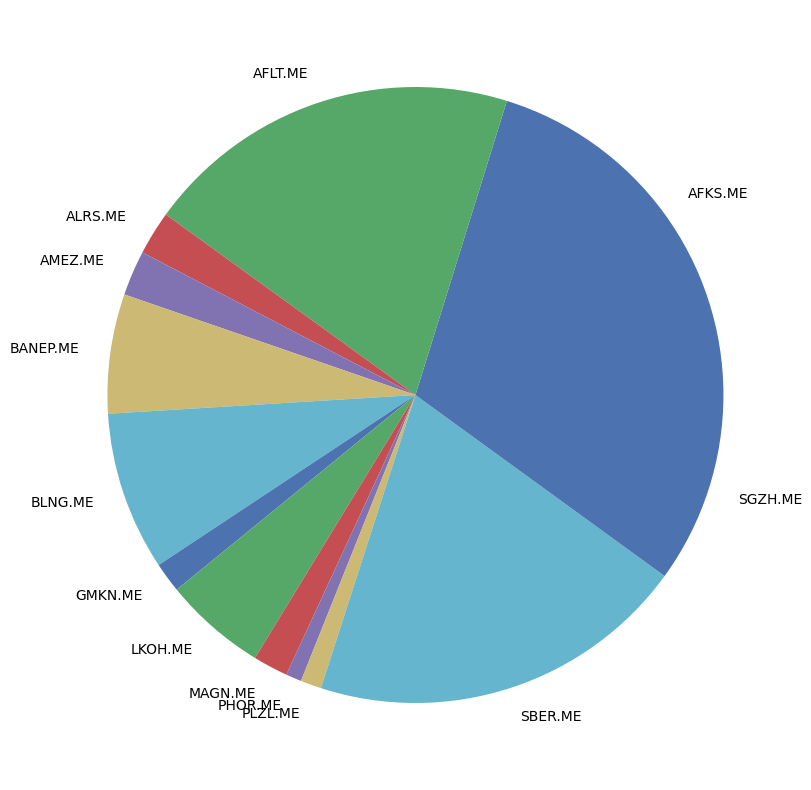

In [48]:
pd.Series(weights).plot.pie(figsize=(10, 10));

In [49]:
ef.portfolio_performance(verbose=True);

Expected annual return: 8.2%
Annual volatility: 20.0%
Sharpe Ratio: 0.31


# Минимизация риска при заданной доходности

In [50]:
ef = EfficientFrontier(mu, S, weight_bounds=(None, None))
ef.add_objective(objective_functions.L2_reg)
ef.efficient_return(target_return=0.07, market_neutral=True)
weights = ef.clean_weights()
weights

OrderedDict([('AFKS.ME', 0.25232),
             ('AFLT.ME', 0.12123),
             ('ALRS.ME', 0.07552),
             ('AMEZ.ME', 0.0606),
             ('BANEP.ME', 0.08946),
             ('BLNG.ME', 0.67876),
             ('GMKN.ME', -0.1769),
             ('LKOH.ME', -0.19212),
             ('MAGN.ME', -0.07451),
             ('PHOR.ME', -0.42707),
             ('PLZL.ME', -0.33452),
             ('SBER.ME', 0.19841),
             ('SGZH.ME', -0.27119)])

In [51]:
ef.portfolio_performance(verbose=True);

Expected annual return: 7.0%
Annual volatility: 47.8%
Sharpe Ratio: 0.10


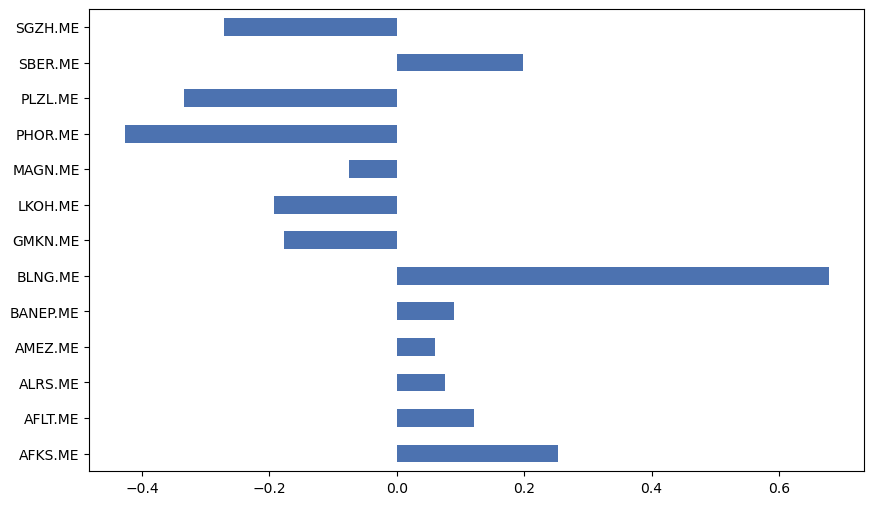

In [52]:
pd.Series(weights).plot.barh(figsize=(10,6));

# Эффективная оптимизация полудисперсии

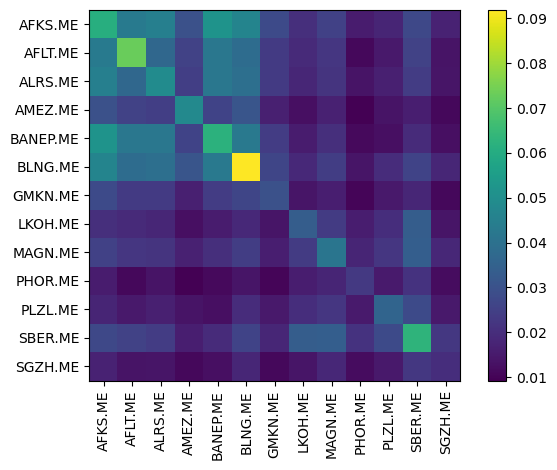

In [54]:
semicov = risk_models.semicovariance(prices, benchmark=0)
plotting.plot_covariance(semicov);

In [55]:
ef = EfficientFrontier(mu, semicov)
ef.efficient_return(0.05)
weights = ef.clean_weights()
weights


OrderedDict([('AFKS.ME', 0.0),
             ('AFLT.ME', 0.0),
             ('ALRS.ME', 0.0),
             ('AMEZ.ME', 0.09152),
             ('BANEP.ME', 0.0),
             ('BLNG.ME', 0.0),
             ('GMKN.ME', 0.18739),
             ('LKOH.ME', 0.02599),
             ('MAGN.ME', 0.0),
             ('PHOR.ME', 0.30652),
             ('PLZL.ME', 0.0),
             ('SBER.ME', 0.0),
             ('SGZH.ME', 0.38858)])

In [56]:
ef.portfolio_performance(verbose=True);

Expected annual return: 5.6%
Annual volatility: 12.2%
Sharpe Ratio: 0.30


In [57]:
returns = expected_returns.returns_from_prices(prices)
returns = returns.dropna()

In [58]:
from pypfopt import EfficientSemivariance

es = EfficientSemivariance(mu, returns)
es.efficient_return(0.05)
es.portfolio_performance(verbose=True);


Expected annual return: 5.8%
Annual semi-deviation: 11.8%
Sortino Ratio: 0.32


In [65]:
es.weights = ef.weights
es.portfolio_performance(verbose=True);

Expected annual return: 7.5%
Annual semi-deviation: 15.3%
Sortino Ratio: 0.36


# Эффективная оптимизация CVaR

In [66]:
returns = expected_returns.returns_from_prices(prices).dropna()
returns.head()

symbol,AFKS.ME,AFLT.ME,ALRS.ME,AMEZ.ME,BANEP.ME,BLNG.ME,GMKN.ME,LKOH.ME,MAGN.ME,PHOR.ME,PLZL.ME,SBER.ME,SGZH.ME
Date,,,,,,,,,,,,,
2021-04-29 21:00:00,-0.010875,-0.003705,0.005730,-0.016260,0.002124,-0.005891,-0.022863,-0.016005,-0.011247,0.011332,-0.010782,0.001278,-0.002532
2021-04-30 21:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2021-05-01 21:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2021-05-02 21:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2021-05-03 21:00:00,-0.011259,0.009606,-0.003032,0.020661,0.002120,0.016296,0.018267,0.030723,-0.004199,0.004802,0.008885,0.017936,0.003807


In [67]:
ef = EfficientFrontier(mu, S)
ef.max_sharpe()
weight_arr = ef.weights
ef.portfolio_performance(verbose=True);

Expected annual return: 7.5%
Annual volatility: 16.2%
Sharpe Ratio: 0.34


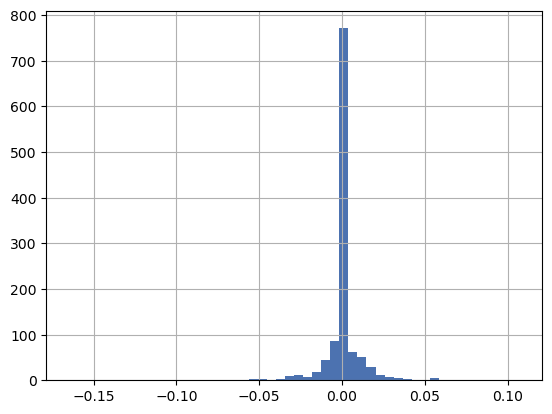

In [68]:
portfolio_rets = (returns * weight_arr).sum(axis=1)
portfolio_rets.hist(bins=50);

In [69]:
var = portfolio_rets.quantile(0.05)
cvar = portfolio_rets[portfolio_rets <= var].mean()
print("VaR: {:.2f}%".format(100*var))
print("CVaR: {:.2f}%".format(100*cvar))

VaR: -1.31%
CVaR: -3.25%


In [70]:
from pypfopt import EfficientCVaR

ec = EfficientCVaR(mu, returns)
ec.min_cvar()
ec.portfolio_performance(verbose=True);

Expected annual return: 5.9%
Conditional Value at Risk: 2.72%


In [71]:
from pypfopt import EfficientCVaR

ec = EfficientCVaR(mu, returns)
ec.efficient_risk(target_cvar=0.03)
ec.portfolio_performance(verbose=True);

Expected annual return: 7.3%
Conditional Value at Risk: 3.00%


# Отрисовка алгоритма Efficient Frontier

In [66]:
from pypfopt import CLA, plotting

cla = CLA(mu, S)
cla.max_sharpe()
cla.portfolio_performance(verbose=True);

Expected annual return: 7.1%
Annual volatility: 15.2%
Sharpe Ratio: 0.33


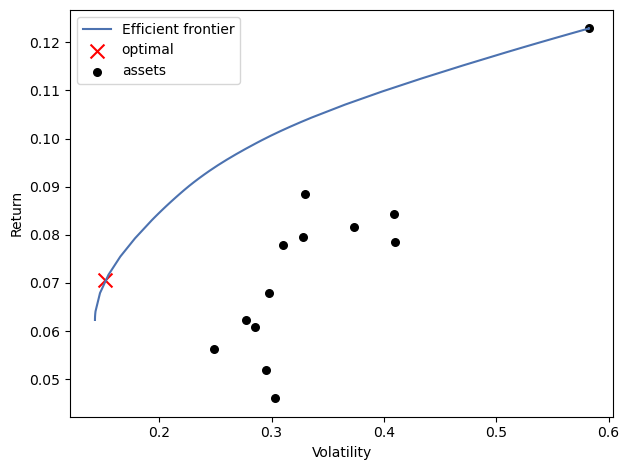

In [67]:
ax = plotting.plot_efficient_frontier(cla, showfig=False)

# Отрисовка нагернеренных портфелей

In [72]:
n_samples = 10000
w = np.random.dirichlet(np.ones(len(mu)), n_samples)
rets = w.dot(mu)
stds = np.sqrt((w.T * (S @ w.T)).sum(axis=0))
sharpes = rets / stds

print("Сэмплированные доходности:", rets)
print("Сэмплированные волатильности:", stds)

Сэмплированные доходности: [0.08185152 0.07890694 0.07225953 ... 0.06702097 0.07163415 0.06985703]
Сэмплированные волатильности: 0       0.209316
1       0.187723
2       0.189662
3       0.213293
4       0.306679
          ...   
9995    0.177531
9996    0.204377
9997    0.157355
9998    0.165838
9999    0.165430
Length: 10000, dtype: float64


C:\Users\killorpie\AppData\Local\Temp\ipykernel_13620\3233933748.py:14: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


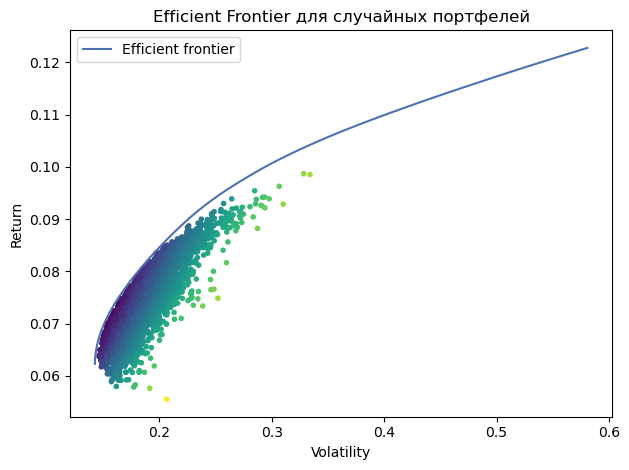

In [74]:
ef = EfficientFrontier(mu, S)

fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False)

ef2 = EfficientFrontier(mu, S)
ef2.max_sharpe()
ret_tangent, std_tangent, _ = ef2.portfolio_performance()

ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")

ax.set_title("Efficient Frontier для случайных портфелей")
ax.legend()
plt.tight_layout()
plt.show()
